In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#load the data

init_df = pd.read_csv('./data/_All_Cities_Cleaned.csv')
init_df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [4]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


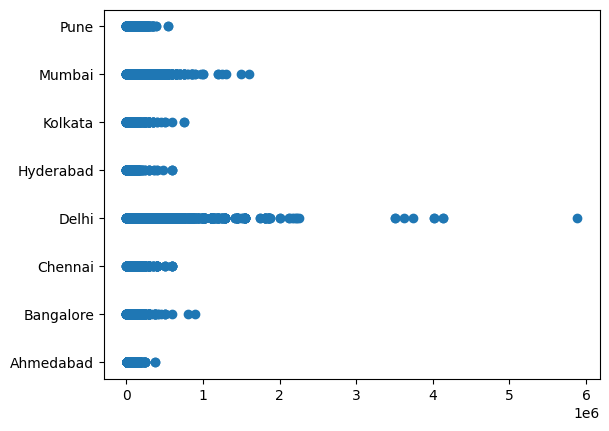

In [5]:
# I'll be doing visualization later, as I need to learn more about it!
plt.scatter(init_df.price,init_df.city)

In [6]:
#! Encoding Values 
# Okay so there are 6 String feilds which we need to encode
#! For values like seller_type, city where they are not related we'll use get_dummies
#* For values like furnish_type,  layout_type where they can be arranged as rank, as BHK > RK, we will use label encoder

seller_type = pd.get_dummies(init_df.seller_type)
init_df = init_df.drop('seller_type', axis='columns')
init_df = pd.concat([init_df, seller_type], axis="columns")

e_property = pd.get_dummies(init_df.property_type)
init_df = init_df.drop('property_type', axis='columns')
init_df = pd.concat([init_df, e_property], axis='columns')
init_df.tail()

from sklearn.preprocessing import LabelEncoder

layout_encoder = LabelEncoder()
e_layout = layout_encoder.fit_transform(init_df.layout_type)
init_df.layout_type = e_layout

furnish_encoder = LabelEncoder()
e_furnish = furnish_encoder.fit_transform(init_df.furnish_type)
init_df.furnish_type = e_furnish

city_encoder = LabelEncoder()
e_city = city_encoder.fit_transform(init_df.city)
init_df.city = e_city

# ! Still don't know weather to use label encoder or dummies
locality_encoder = LabelEncoder()
e_locality = locality_encoder.fit_transform(init_df.locality)
init_df.locality = e_locality

#* Now we need to repeat this, for this we better write a function
# TODO - Solve this error when using functions!
# !cannot access local variable 'init_df' where it is not associated with a value
#! Note, I'm not removing the last dummy column, let's see how it impacts the model i.e Linear Collinearilty Error or So it's called

init_df.head()

,bedroom,layout_type,locality,price,area,furnish_type,bathroom,city,AGENT,BUILDER,OWNER,Apartment,Independent Floor,Independent House,Penthouse,Studio Apartment,Villa
0,2.0,0,567,20000.0,1450.0,0,2.0,0,0,0,1,1,0,0,0,0,0
1,1.0,1,633,7350.0,210.0,1,1.0,0,0,0,1,0,0,0,0,1,0
2,3.0,0,1481,22000.0,1900.0,2,3.0,0,0,0,1,1,0,0,0,0,0
3,2.0,0,3053,13000.0,1285.0,1,2.0,0,0,0,1,0,0,1,0,0,0
4,2.0,0,2433,18000.0,1600.0,0,2.0,0,0,0,1,0,0,1,0,0,0


In [7]:
# Renaming the rows
init_df.rename(columns={"AGENT":"agent","OWNER":"owner", "BUILDER":"builder", "Apartment":"apartment", "Independent Floor":"independent_floor", "Independent House":"independent_house", "Penthouse":"penthouse", "Studio Apartment":"studio_apartment","Villa":"villa"}, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split

init_df.head()

,bedroom,layout_type,locality,price,area,furnish_type,bathroom,city,agent,builder,owner,apartment,independent_floor,independent_house,penthouse,studio_apartment,villa
0,2.0,0,567,20000.0,1450.0,0,2.0,0,0,0,1,1,0,0,0,0,0
1,1.0,1,633,7350.0,210.0,1,1.0,0,0,0,1,0,0,0,0,1,0
2,3.0,0,1481,22000.0,1900.0,2,3.0,0,0,0,1,1,0,0,0,0,0
3,2.0,0,3053,13000.0,1285.0,1,2.0,0,0,0,1,0,0,1,0,0,0
4,2.0,0,2433,18000.0,1600.0,0,2.0,0,0,0,1,0,0,1,0,0,0


In [9]:
Y = init_df['price']
X = init_df.drop('price', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

model.score(X_test, y_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38603 entries, 168917 to 131919
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            38603 non-null  float64
 1   layout_type        38603 non-null  int32  
 2   locality           38603 non-null  int32  
 3   area               38603 non-null  float64
 4   furnish_type       38603 non-null  int32  
 5   bathroom           38603 non-null  float64
 6   city               38603 non-null  int32  
 7   agent              38603 non-null  uint8  
 8   builder            38603 non-null  uint8  
 9   owner              38603 non-null  uint8  
 10  apartment          38603 non-null  uint8  
 11  independent_floor  38603 non-null  uint8  
 12  independent_house  38603 non-null  uint8  
 13  penthouse          38603 non-null  uint8  
 14  studio_apartment   38603 non-null  uint8  
 15  villa              38603 non-null  uint8  
dtypes: float64(3), i

In [13]:
import joblib

with open('model.joblib', 'wb') as f:
    joblib.dump(model, f, compress='lzma')


In [14]:
with open('model.joblib', 'rb') as f:
    test = joblib.load(f)
    res = test.score(X_test, y_test)
    print(res)


0.8443596707436799


In [12]:
with open('model.joblib', 'rb') as f:
    test = joblib.load(f)
    res = test.predict([[3,0,1,1234.9,2,2.0,2,2,0,1,0,0,0,1,0,0]])
    print(res)


[21860.]


c:\Users\utkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
